### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
%%HTML
<style> 
    code 
    {
    font-size : 13.5px !important;
    color :red !important;
    background-color : White !important;
    border:0.8px !important;
    border-style: solid !important;
    border-color: LightGray !important;
    }
</style>

In [4]:
# Function to make the visualizations neater
def cleanaxes(ax):
    for i in ax:
        i.spines['right'].set_visible(False)
        i.spines['top'].set_visible(False)
        i.grid(False)

### Loading and viewing the data

In [5]:
ab = pd.read_csv("train.csv")
ab.head(2)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0


In [6]:
#viewing some more columns
ab.loc[:,'cleaning_fee':'latitude'].head(2)

,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude
0,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524
1,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115


In [7]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

### Viewing all data points on a interactive map

Map generated using Tableau

Zoom into view areas of interest. Colours represent the price. Can filter using price and number of bedrooms.

In [31]:
%%HTML
<script type='text/javascript' src='https://us-east-1.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1280px; height: 490px;'><object class='tableauViz' width='1280' height='490' style='display:none;'><param name='host_url' value='https%3A%2F%2Fus-east-1.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;tejassk' /><param name='name' value='Airbnbproject&#47;Sheet4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /><param name='filter' value='iframeSizedToWindow=true' /></object></div>

### Dropping irrelevant columns

We can drop columns that will not be useful for analysis. We drop the following columns:<br>
`cleaning_fee`, `first_review`, `last_review`, `description` , `host_has_profile_pic`, `instant_bookable`, `name`, `thumbnail_url`

In [9]:
ab.drop(['cleaning_fee','first_review', 'last_review','description',
         'host_has_profile_pic', 'instant_bookable', 'name', 'thumbnail_url'],axis=1,inplace=True)

In [10]:
#renaming columns
ab = ab.rename(columns={'log_price':'price','accommodates':'capacity',})

### Modifying price column

In [11]:
#Converting price from log to actual
ab.price = np.exp(ab.price)

### Describe numeric columns

In [12]:
ab.describe()

,id,price,capacity,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,160.370849,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,168.580415,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,1.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,75.000000,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,111.000000,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,185.000000,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,1999.000000,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


explain

### Describe categorical columns

In [13]:
ab.describe(include=['O'])

,property_type,room_type,amenities,bed_type,cancellation_policy,city,host_identity_verified,host_response_rate,host_since,neighbourhood,zipcode
count,74111,74111,74111,74111,74111,74111,73923,55812,73923,67239,73145
unique,35,3,67122,5,5,6,2,80,3087,619,769
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,t,100%,2015-03-30,Williamsburg,11211.0
freq,49003,41310,586,72028,32374,32349,49748,43254,246,2862,1368


explain

###  Price distribution

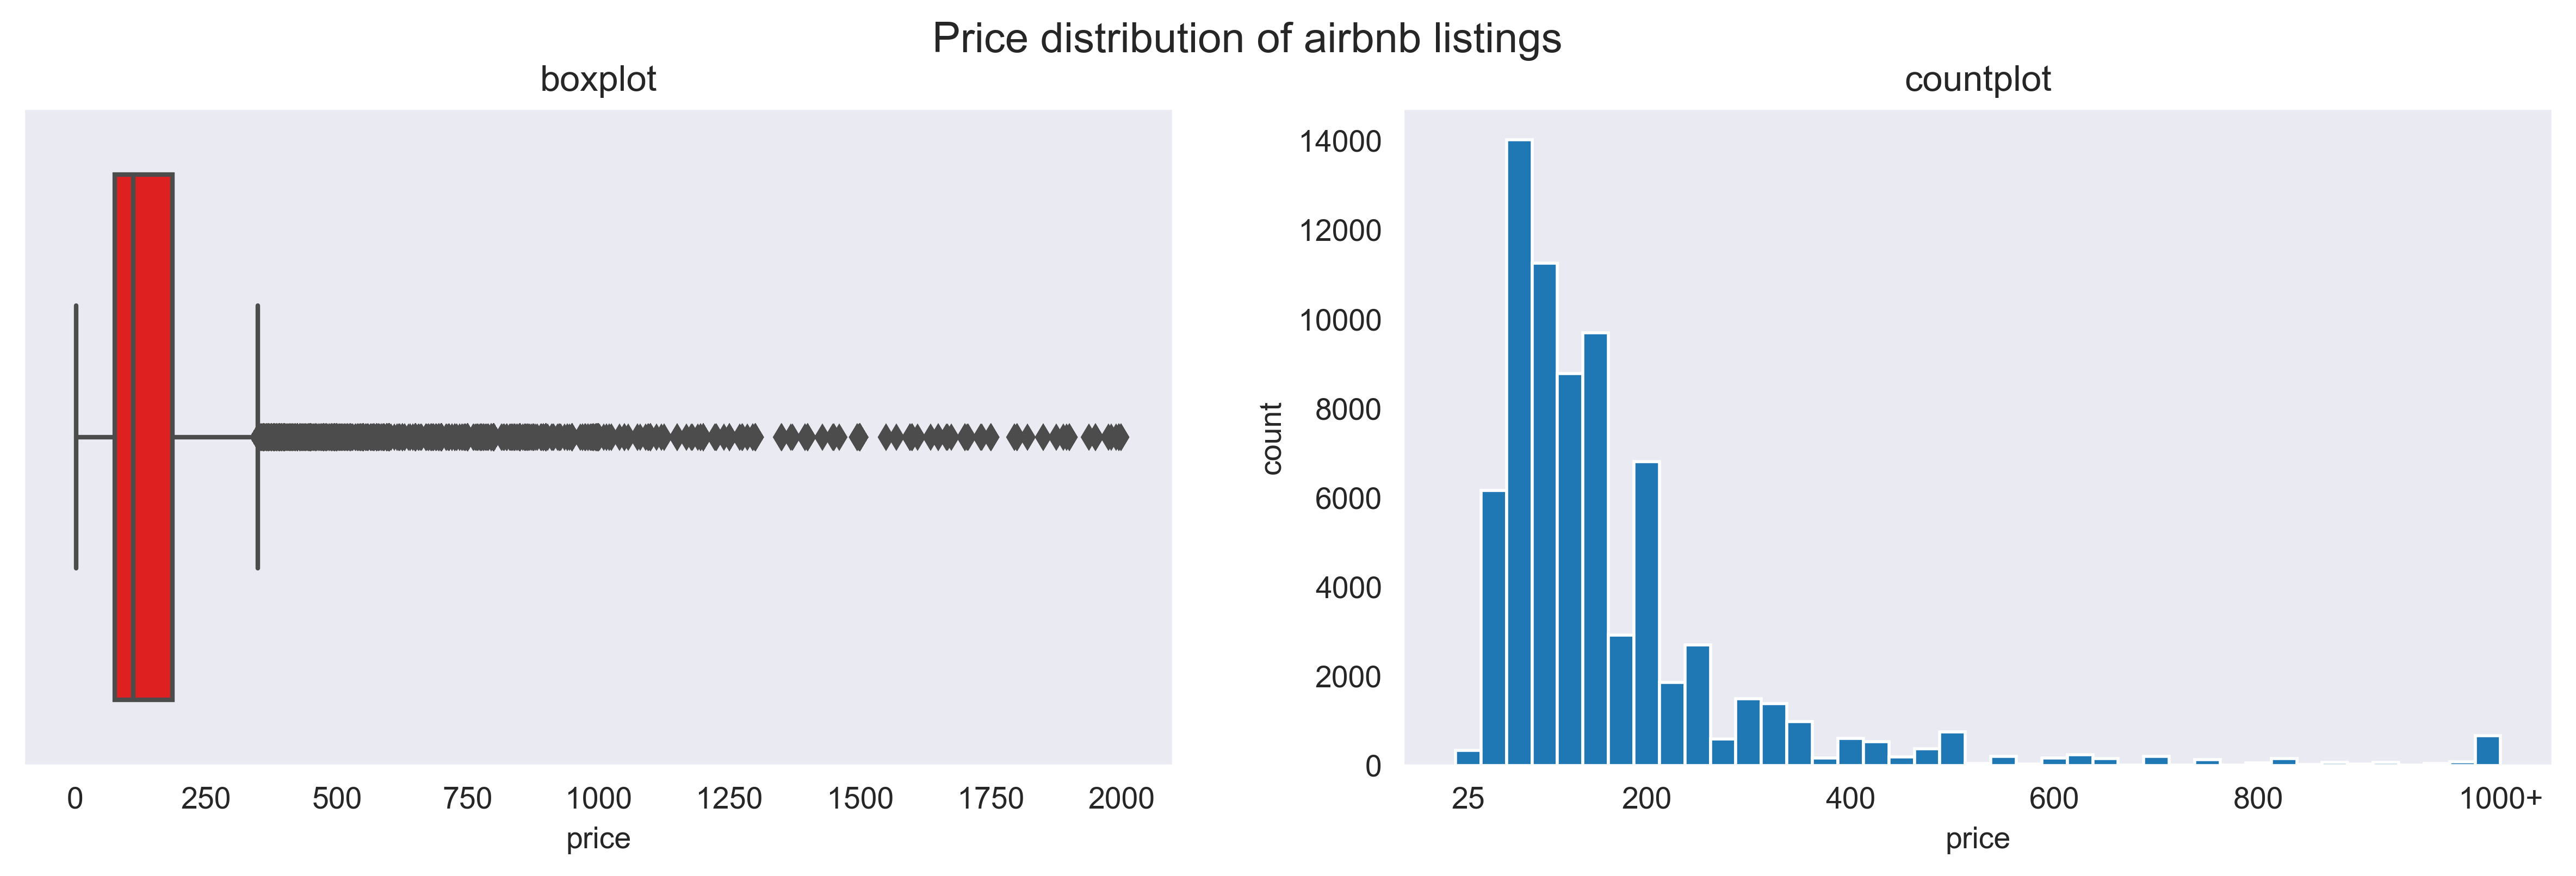

In [14]:
sns.set_style('dark')
fig = plt.figure(figsize=(15,4),dpi=400)
fig.suptitle("Price distribution of airbnb listings",size=14)

#boxplot
ax1 = plt.subplot(1,2,1)
plt.title('boxplot')
sns.boxplot(data=ab,x='price',color='red')
labels=ax1.get_xticks()

#Histogram/Countplot
ax2 = plt.subplot(1,2,2)
bins = np.arange(0,1050,25)
#combine all prices above 1000 in a single bucket and plot a histogram
plt.hist([np.clip(ab.price, bins[0], bins[-1])], bins=bins) 
#use ax.get_ticks() and then modify list accordingly to set xticks.
ax2.set_xticks([12.5,   187.5,   387.5,   587.5,   787.5,  1025]) 
ax2.set_xticklabels(['25','200','400','600','800','1000+']) #matching ticks to appropriate labels
plt.xlabel('price')
plt.ylabel('count')
plt.title('countplot')
plt.show()
bcd=ax2.get_xticks()

Most of the listings lie between the \\$75 - $125 range. We will not eliminate any rows as the price values seem reasonable. None of them seem huge outliers and prices can be high due to a number of reasons, which we will explore further.

### Accommodation capacity and price per person

We describe a new column `ppp` which stands for price per person. This is calculated by diving the price by capacity(number of people that can be accommodated). This can be used as a metric to measure how expensive a place is per person.
Looking at only the price can be misleading sometimes as some houses can be larger than others and don't neccessarilty represent how expensive a house really is. <br> Having said that, the ppp isn't completely reliable as well. This is because in most cases a house won't be fully utilized or the capacity might be flexible. House size would be a more appropriate measure but it isn't available and has its own complications. 

In [15]:
ab['ppp']= ab.price/ab.capacity # defining a new column ppp that stands for price per person.

#### Distribution

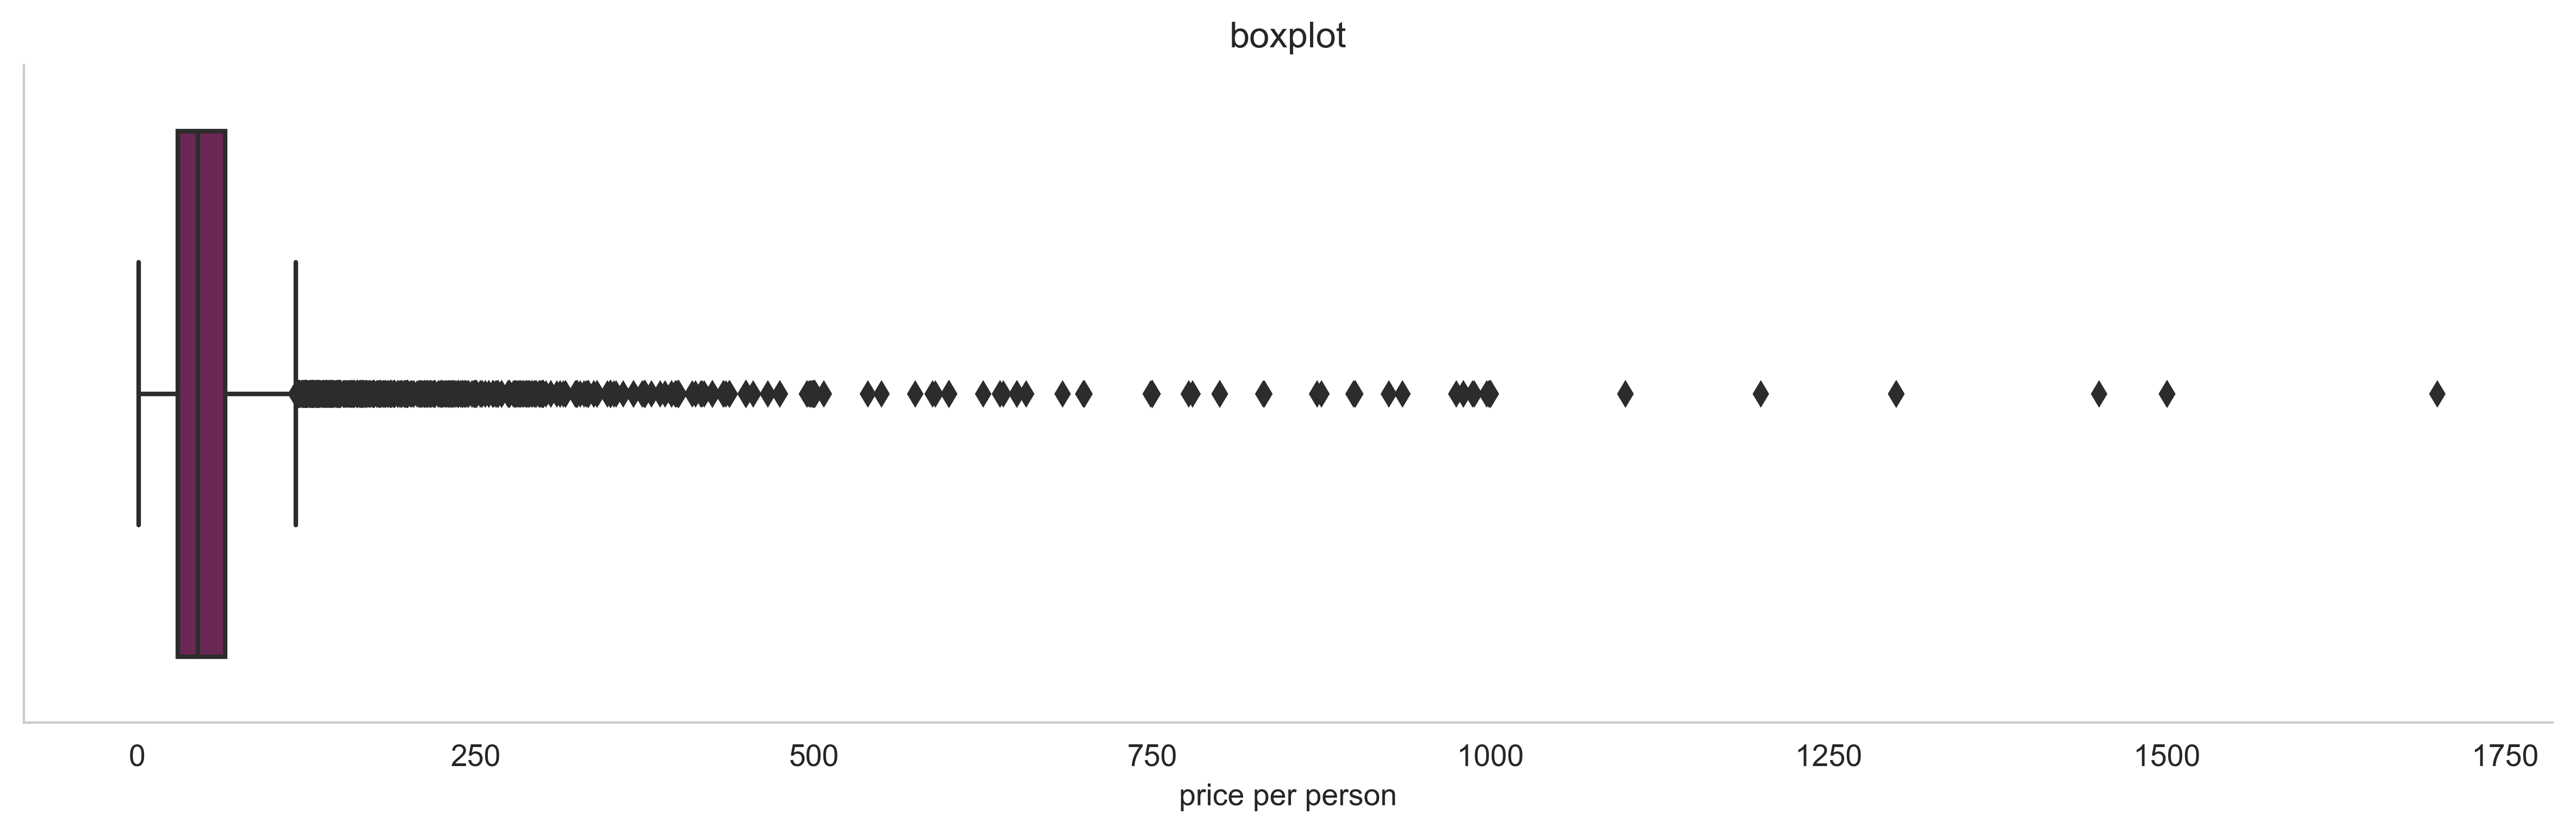

In [16]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,4),dpi=400)
ax=sns.boxplot(data=ab,x='ppp',color='#761C58')
plt.xlabel('price per person')
plt.title('boxplot')
cleanaxes([ax])
plt.show()

Houses above price per person of 1000 are rare and unusually expensive. We can eliminate these values from our data. 

In [17]:
ab=ab.loc[ab.ppp<1000] #remove outliers

__Correlation between capacity and price__

Hypothesis: We expect that higher the number of people that can be accommodated in a house, higher its price. If this logic holds, we would expect the ppp(price/capacity) to be roughly constant with a change in capacity. This is because a change in capacity would also cause a change in price and the two would balance eachother out in the ppp calculation. <br> 
In reality, we would expect the price per person to go down slightly with an increase in capacity. For eg. though a three bedroom apartment is usually more expensive than a 2 bedroom apartment, the price per person in a 3 bedroom apartment is lesser, keeping all other factors constant. 

In [18]:
ab[['price','capacity','ppp']].corr()

,price,capacity,ppp
price,1.000000,0.525138,0.601709
capacity,0.525138,1.000000,-0.135880
ppp,0.601709,-0.135880,1.000000


We see that the correlation between price and capacity is 0.52, which indicates a positive relationship between the two. Also, there is very slight negative correlation between ppp and capacity. Thus our hypothesis is correct. 

#### Visualizing the relationship

C:\Users\Tejas\Anaconda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


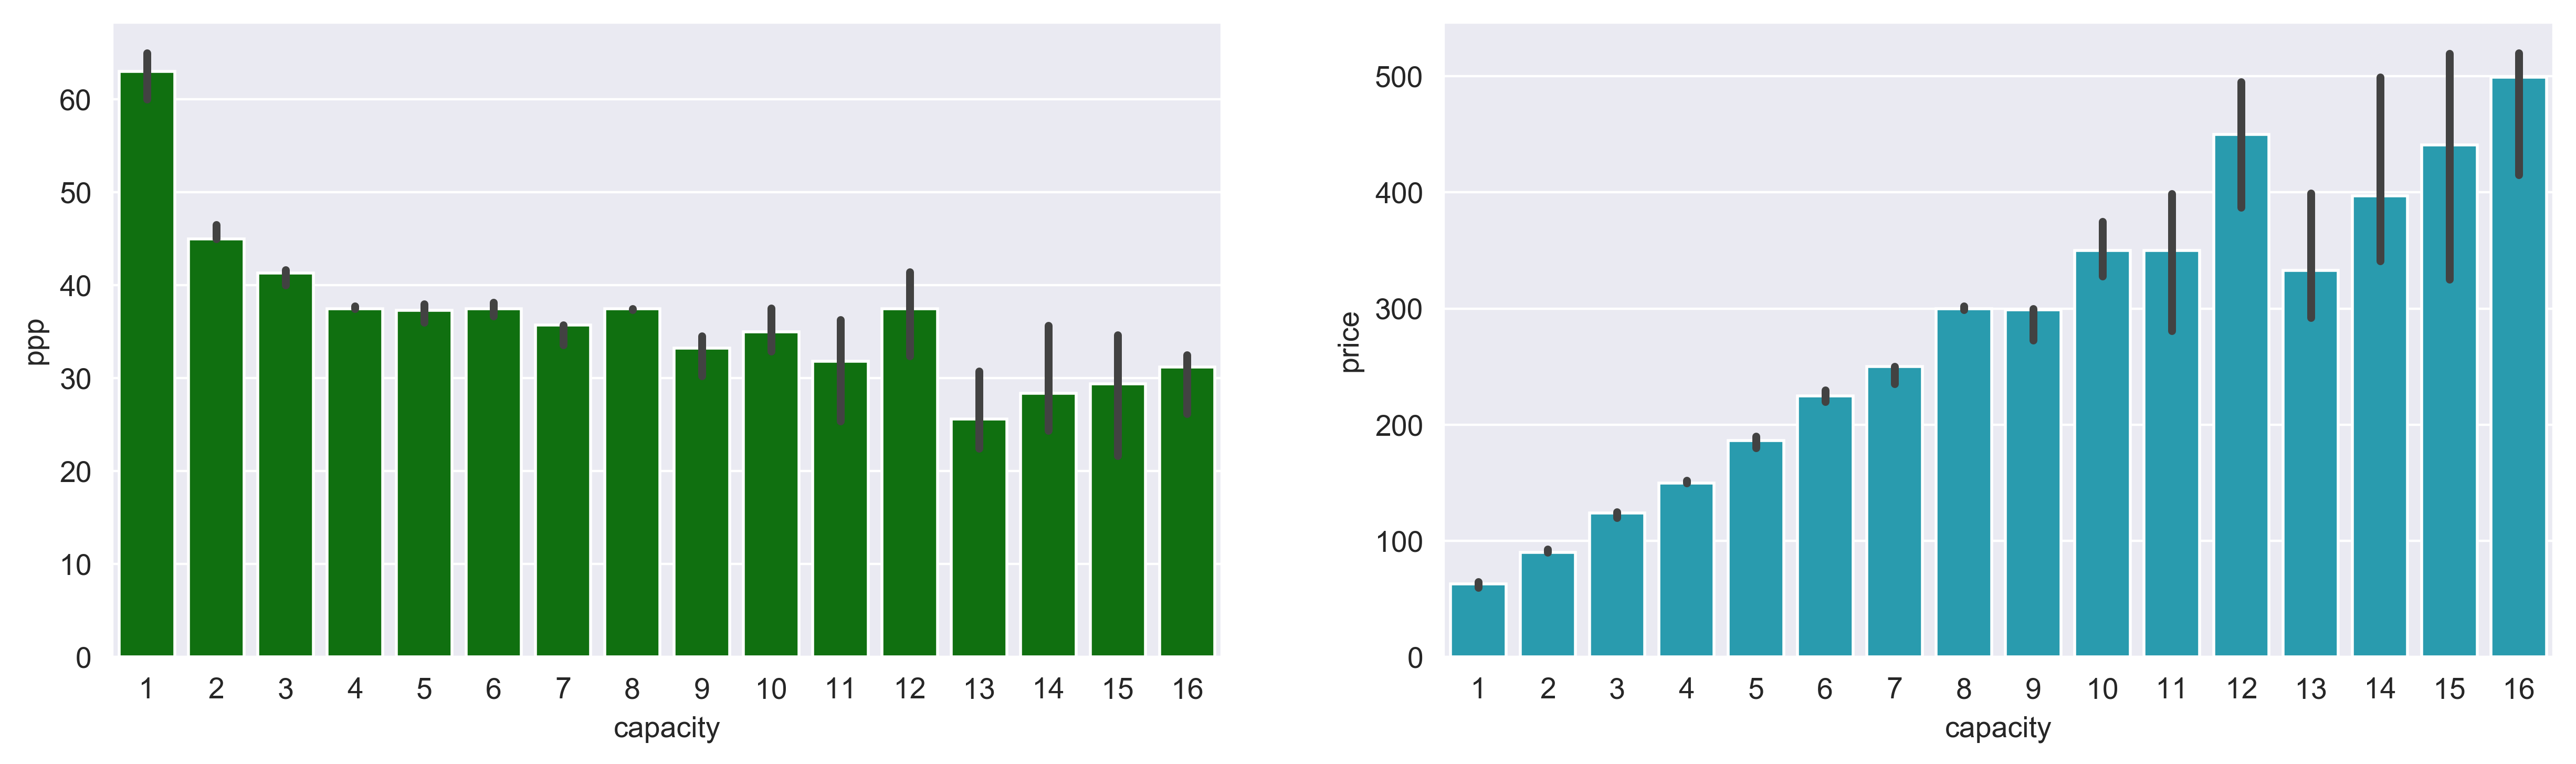

In [19]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,4),dpi=400)
ax1=plt.subplot(1,2,1)
sns.barplot(data=ab,x='capacity',y='ppp',color='green',estimator=np.median)
ax2=plt.subplot(1,2,2)
sns.barplot(data=ab,x='capacity',y='price',color='#13abc4',estimator=np.median)
plt.show()

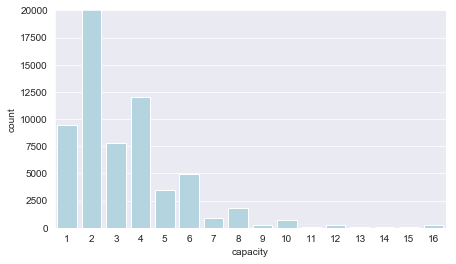

In [20]:
fig = plt.figure(figsize=(7,4))
sns.countplot(data=ab,x='capacity',color='lightblue')
plt.ylim((0,20000))
plt.show()

In [21]:
ab.head()

,id,price,property_type,room_type,amenities,capacity,bathrooms,bed_type,cancellation_policy,city,...,host_since,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,ppp
0,6901257,150.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,NYC,...,2012-03-26,40.696524,-73.991617,Brooklyn Heights,2,100.0,11201,1.0,1.0,50.000000
1,6304928,169.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,NYC,...,2017-06-19,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,24.142857
2,7919400,145.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,NYC,...,2016-10-25,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0,29.000000
3,13418779,750.0,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,SF,...,2015-04-19,37.772004,-122.431619,Lower Haight,0,NaN,94117.0,2.0,2.0,187.500000
4,3808709,115.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,DC,...,2015-03-01,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0,57.500000


### Most expensive cities

In [22]:
colors = {'Chicago':'#fe4a49',
          'LA':'#fed766',
          'NYC':'#2ab7ca',
          'DC':'#f6abb6',
          'Boston':'lightgrey',
          'SF':'#35a79c'}

In [23]:
median_prices = ab.groupby('city').median()['price'].sort_values()
mean_prices = ab.groupby('city').mean()['price'].sort_values()

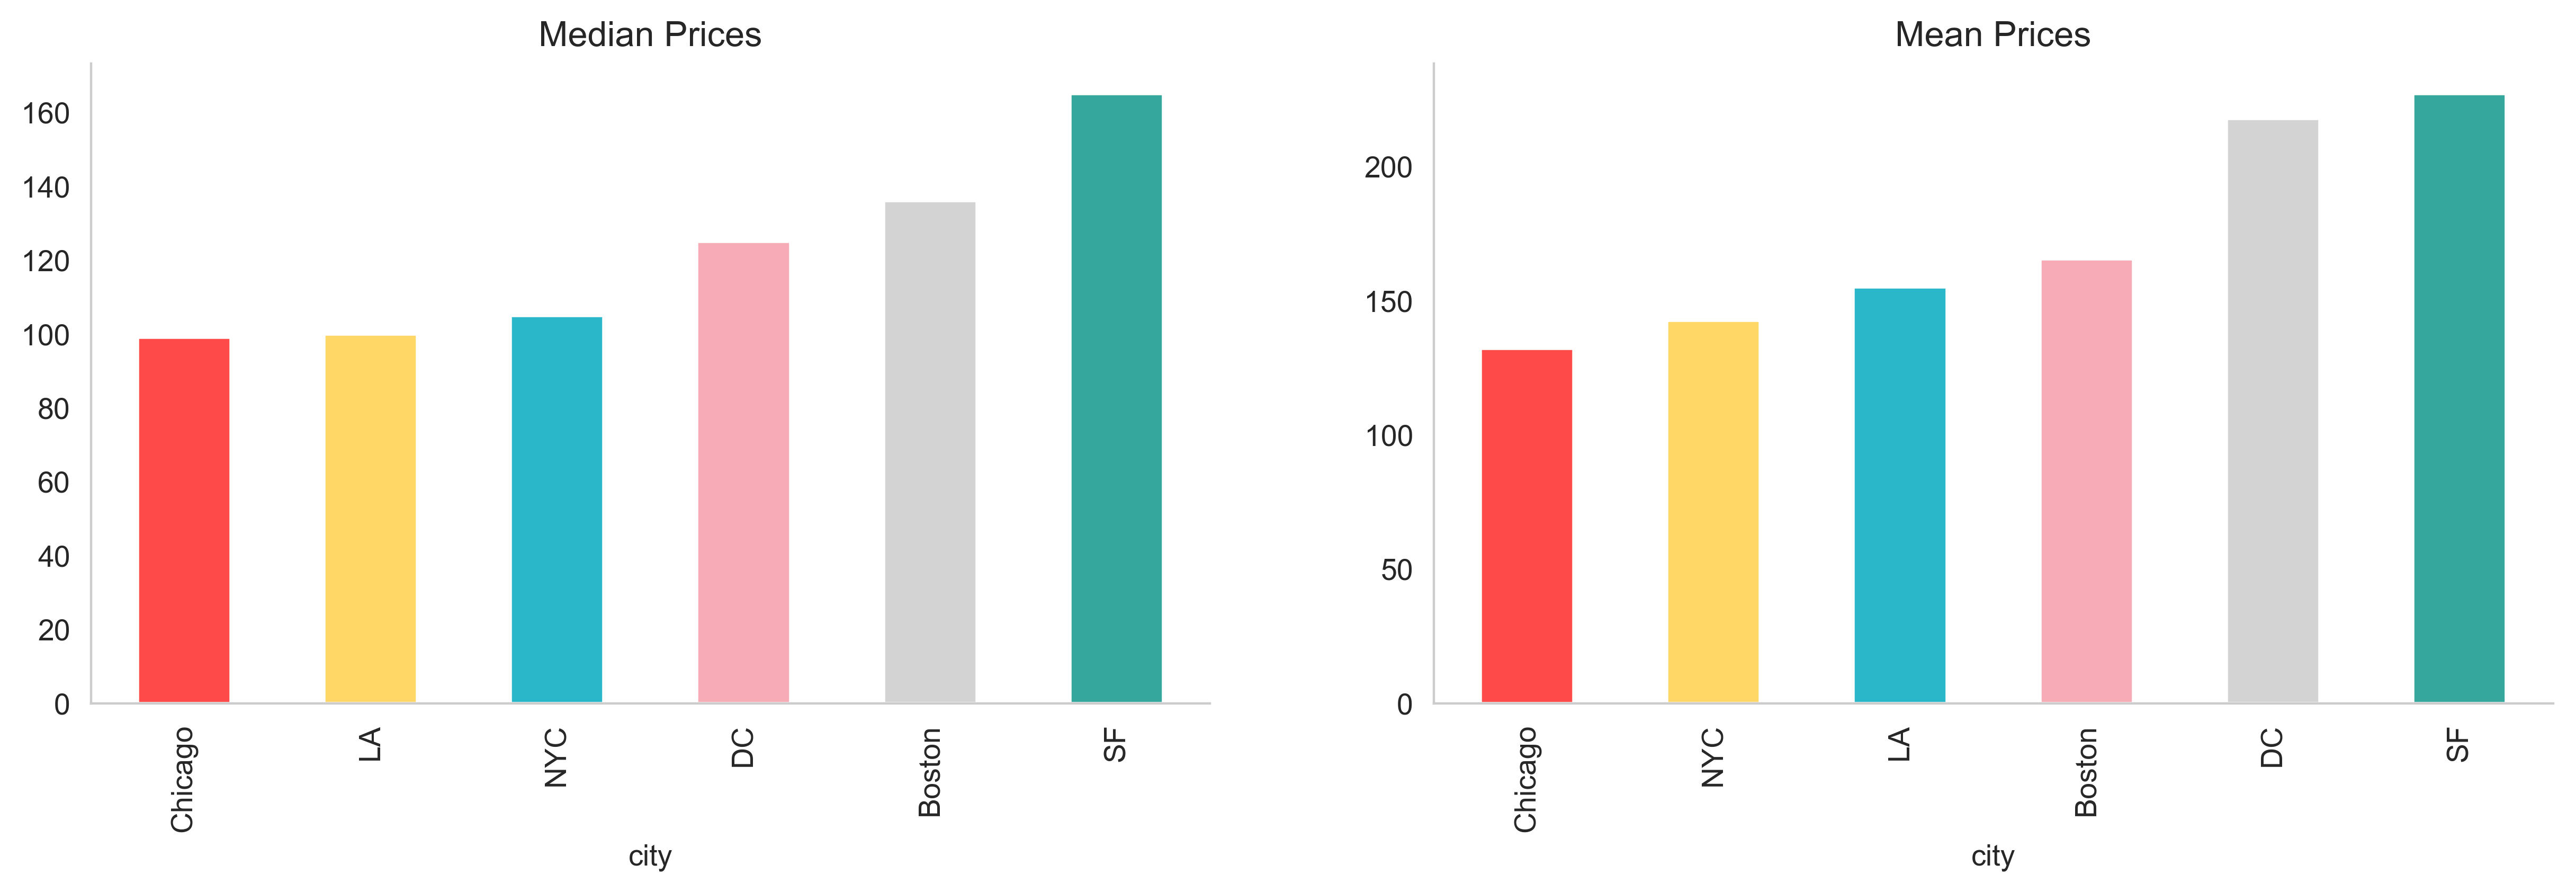

In [24]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,4),dpi=400)
ax1=plt.subplot(1,2,1)
median_prices.plot(kind='bar',color=[colors[i] for i in median_prices.index])
plt.title('Median Prices')
ax2=plt.subplot(1,2,2)
mean_prices.plot(kind='bar',color=[colors[i] for i in median_prices.index])
plt.title('Mean Prices')
cleanaxes([ax1,ax2])
plt.show()

### Number of listings for each city

In [25]:
coordinates = ab.groupby('city').mean().loc[:,['latitude','longitude']]
coordinates

,latitude,longitude
city,,
Boston,42.339665,-71.084127
Chicago,41.908236,-87.664405
DC,38.912690,-77.020182
LA,34.056481,-118.333833
NYC,40.730170,-73.954890
SF,37.766863,-122.431234


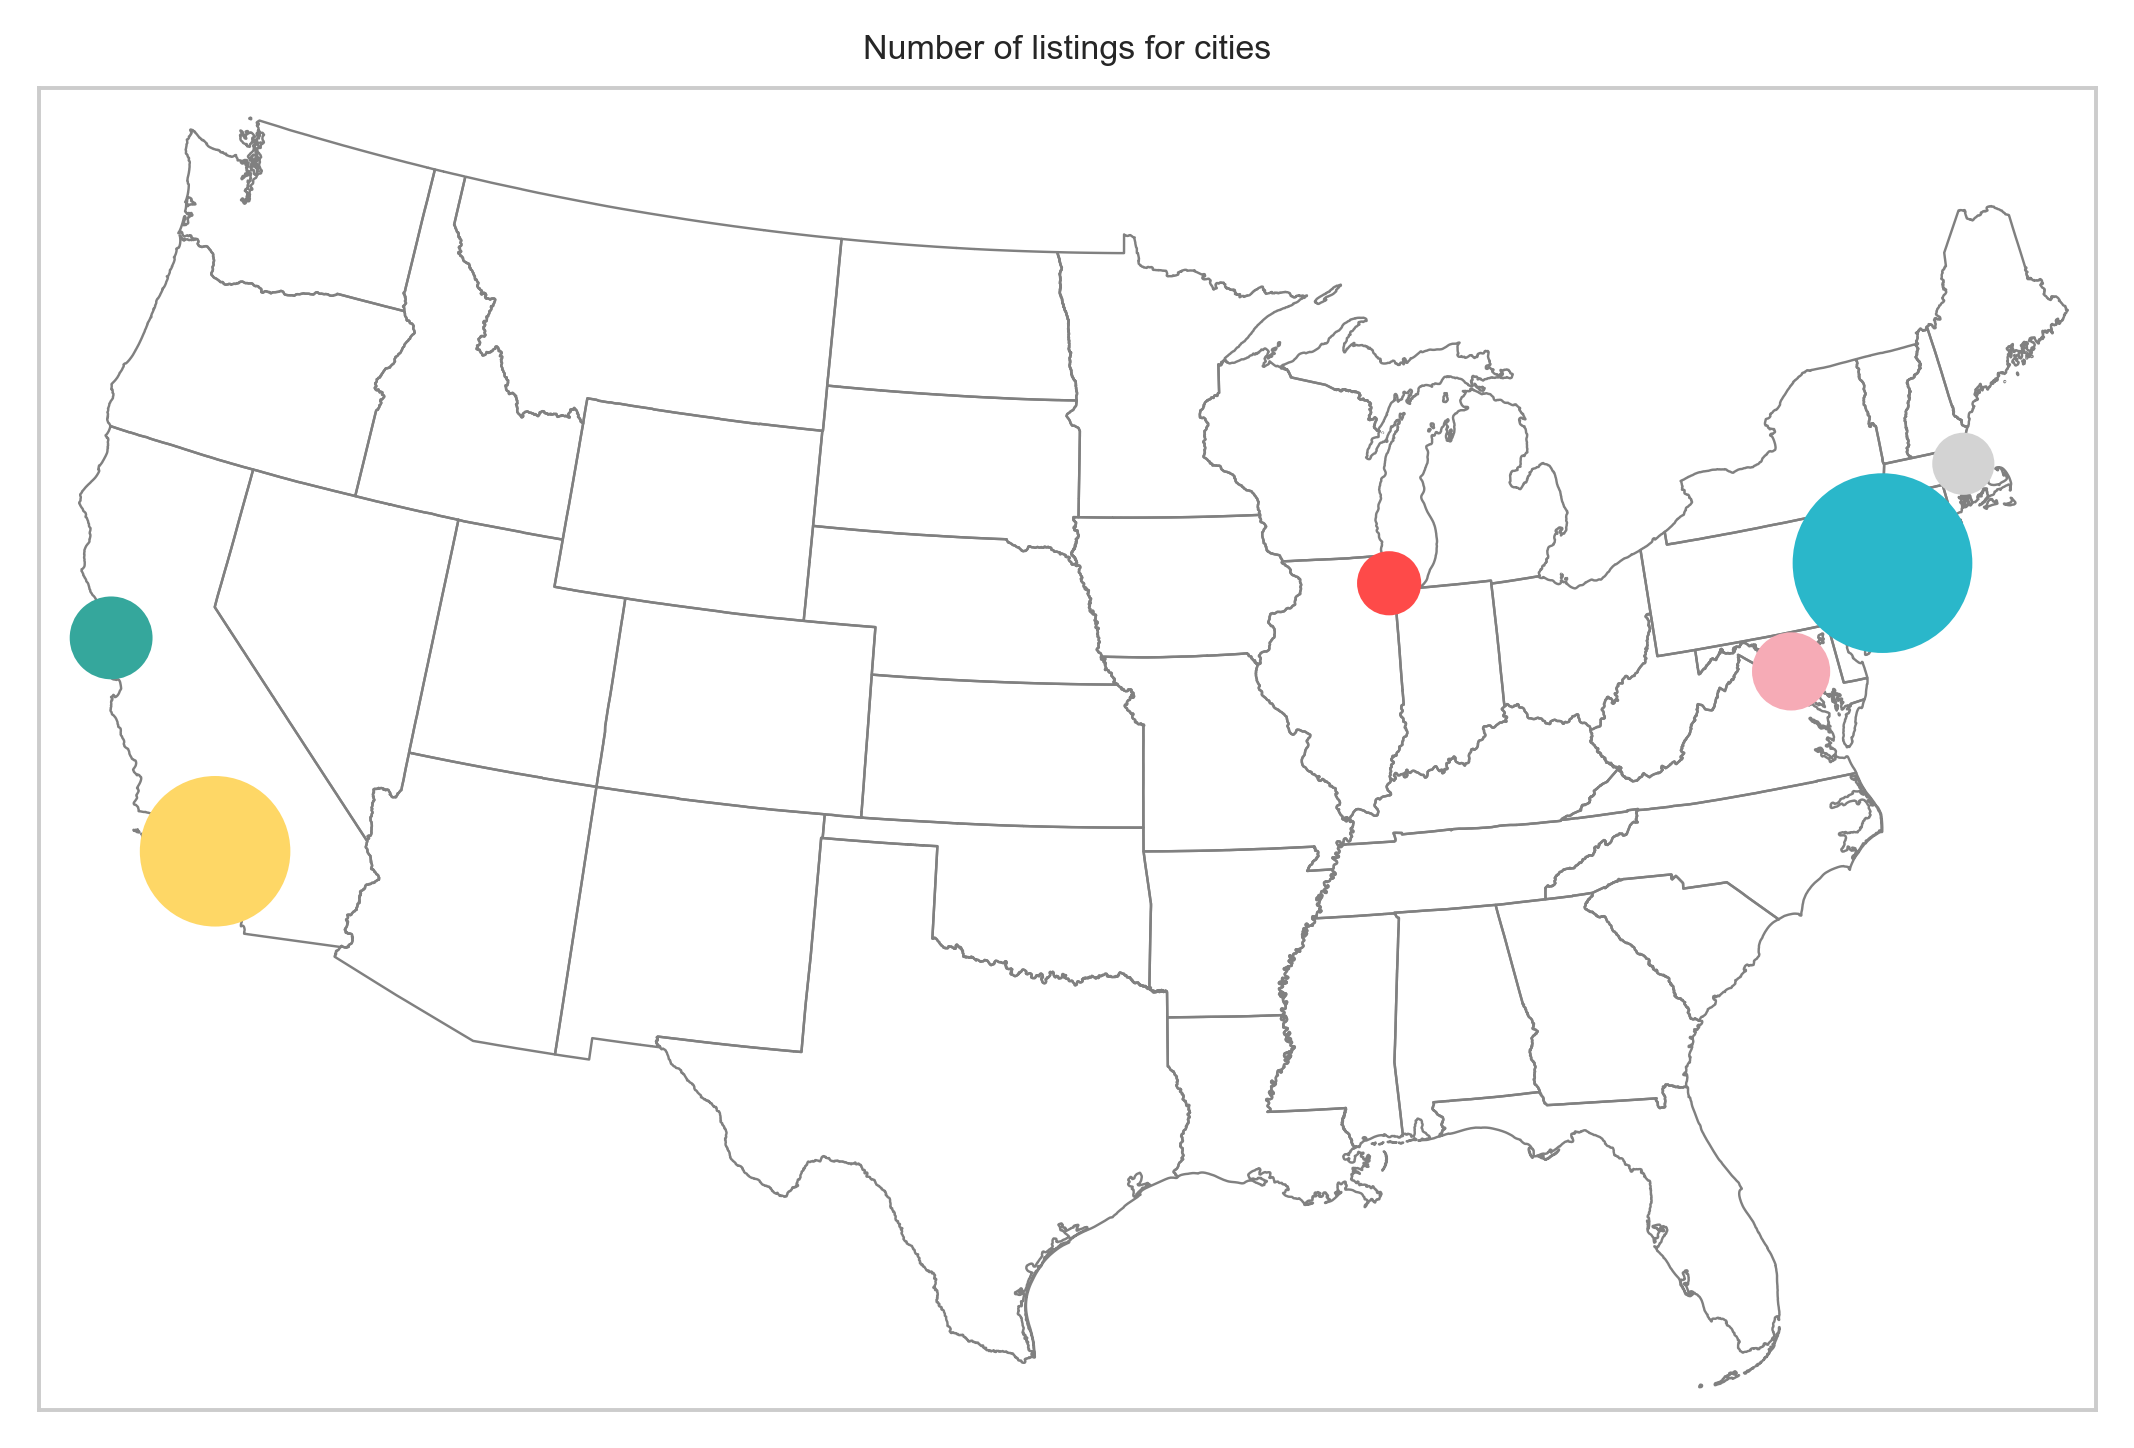

In [26]:
plt.figure(figsize=(15,5),dpi=350)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
m.readshapefile('C:/Users/Tejas//Documents/shapefiles/st99_d00', name='states', drawbounds=True,color='grey')
x,y = m(coordinates.longitude.tolist(),coordinates.latitude.tolist())
s=ab.groupby('city').id.count()/25
m.scatter(x,y,zorder=3,s=s,color=[colors[i] for i in coordinates.index])
plt.title("Number of listings for cities",size=7)
plt.show()

### Neighbourhoods with most listings

In [27]:
nbh_counts = ab.groupby(['neighbourhood','city']).count()[['id']].sort_values(by='id',ascending=False)
nbh_counts.columns = ['count']
nbh_counts.head(10)

,,count
neighbourhood,city,
Williamsburg,NYC,2860
Bedford-Stuyvesant,NYC,2165
Bushwick,NYC,1601
Upper West Side,NYC,1396
Mid-Wilshire,LA,1392
Harlem,NYC,1374
Hollywood,LA,1320
Hell's Kitchen,NYC,1298
Venice,LA,1222


### Most expensive neighbourhoods (atleast 25 listings)

To find the most expensive neighbourhoods we can simply calculate the average/median price and take the top 5. However, here we have an additional condition that states that the number of listings should be atleast 25. To do this, we will add another column to the data that contains the count of the corresponding neighbourhood. After that, we can simply add the condition 'count greater than 25' before calculating average/median prices. We take the number of listings to be atleast 25 to ensure significance.

In [28]:
nbhood = ab.merge(nbh_counts,how='left',left_on = ['neighbourhood','city'],right_index=True)
nbhood = nbhood[['id','neighbourhood','city','count','price','ppp']]
nbhood.head()

,id,neighbourhood,city,count,price,ppp
0,6901257,Brooklyn Heights,NYC,109.0,150.0,50.000000
1,6304928,Hell's Kitchen,NYC,1298.0,169.0,24.142857
2,7919400,Harlem,NYC,1374.0,145.0,29.000000
3,13418779,Lower Haight,SF,124.0,750.0,187.500000
4,3808709,Columbia Heights,DC,298.0,115.0,57.500000


In [29]:
nbhood.loc[nbhood['count']>25].groupby(['neighbourhood','city']).median()[['count','price']]\
.sort_values(by='price',ascending=False).head(10)

,,count,price
neighbourhood,city,,
Malibu,LA,185.0,395.0
Downtown/Penn Quarter,DC,111.0,297.0
Fisherman's Wharf,SF,36.0,267.5
Bel Air/Beverly Crest,LA,131.0,259.0
Tribeca,NYC,103.0,250.0
Noho,NYC,49.0,250.0
Pacific Palisades,LA,128.0,250.0
Laurel Canyon,LA,135.0,230.0
Judiciary Square,DC,55.0,229.0
